<a href="https://colab.research.google.com/github/Abiramianbarasan/Road-accident-risk-prediction-system-using-machine-learning/blob/main/modeltraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
accidents_df = pd.read_csv('/content/gdrive/My Drive/accident_data.csv')
vehicles_df = pd.read_csv('/content/gdrive/My Drive/vehicles_data.csv')

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [ ]:
'''from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = accidents_df.drop(columns=['Accident_Severity'])  # Remove the target column, use accidents_df instead of accidents
# Correctly select the target variable using a list of column names
y = accidents_df[['Accident_Severity','Did_Police_Officer_Attend_Scene_of_Accident', 'Age_of_Driver', 'Vehicle_Type', 'Age_of_Vehicle','Engine_Capacity_(CC)','Day_of_Week' , 'Weather_Conditions' , 'Road_Surface_Conditions' , 'Light_Conditions', 'Sex_of_Driver' ,'Speed_limit']]
#y = accidents_df['Accident_Severity']  # Target variable
# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the splits
print("Training Set:", X_train.shape, y_train.shape)
print("Testing Set:", X_test.shape, y_test.shape)'''

KeyError: "['Age_of_Driver', 'Vehicle_Type', 'Age_of_Vehicle', 'Engine_Capacity_(CC)', 'Sex_of_Driver'] not in index"

In [ ]:
from sklearn.model_selection import train_test_split
# Merge accidents_df and vehicles_df
# Replace 'common_column' with the actual column name that links the two DataFrames
merged_df = pd.merge(accidents_df, vehicles_df, on='Accident_Index', how='inner')

# Define features (X) and target (y)
# Now you can select all desired columns from the merged DataFrame
X = merged_df[['Did_Police_Officer_Attend_Scene_of_Accident', 'Age_of_Driver', 'Vehicle_Type', 'Age_of_Vehicle','Engine_Capacity_(CC)','Day_of_Week' , 'Weather_Conditions' , 'Road_Surface_Conditions' , 'Light_Conditions', 'Sex_of_Driver' ,'Speed_limit']]
y = merged_df['Accident_Severity']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the splits
print("Training Set:", X_train.shape, y_train.shape)
print("Testing Set:", X_test.shape, y_test.shape)

# ... (Rest of your code for model training and evaluation) ...

Training Set: (34133, 11) (34133,)
Testing Set: (8534, 11) (8534,)


In [ ]:
train_test_split(X, y, test_size=0.2, random_state=42)


[       Did_Police_Officer_Attend_Scene_of_Accident  Age_of_Driver  \
 16235                                            2           65.0   
 6492                                             1           26.0   
 7469                                             1           33.0   
 32076                                            1           31.0   
 12515                                            1           24.0   
 ...                                            ...            ...   
 6265                                             1           40.0   
 11284                                            1           68.0   
 38158                                            1           50.0   
 860                                              1           70.0   
 15795                                            2           42.0   
 
                      Vehicle_Type  Age_of_Vehicle  Engine_Capacity_(CC)  \
 16235                         Car            12.0                 100.0   
 6492 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Assuming 'Accident_Index' is the problematic column:
for col in X_train.select_dtypes(include=['object']).columns:
    # Check if the column is 'Accident_Index'
    if col == 'Accident_Index':
        # Drop 'Accident_Index' from both training and testing sets
        X_train = X_train.drop(columns=['Accident_Index'])
        X_test = X_test.drop(columns=['Accident_Index'])
        continue  # Move to the next column

    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])

    # Handle unseen labels in X_test
    X_test[col] = X_test[col].map(lambda s: le.transform([s])[0] if s in le.classes_ else -1)
    # If unseen, assign -1 or any other placeholder


dt_model = DecisionTreeClassifier(max_depth=10, random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Assuming 'Accident_Index' and other potential string columns are problematic:
for col in X_train.select_dtypes(include=['object']).columns:
    # Check if the column is 'Accident_Index' or other columns you want to drop
    if col in ['Accident_Index', 'other_string_column1', 'other_string_column2']:  # Add other column names if needed
        # Drop these columns from both training and testing sets
        X_train = X_train.drop(columns=[col])
        X_test = X_test.drop(columns=[col])
        continue  # Move to the next column

    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])

    # Handle unseen labels in X_test more robustly
    # Create a dictionary mapping original labels to encoded values
    label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

    # Apply the mapping to X_test, using -1 for unseen labels
    X_test[col] = X_test[col].map(lambda s: label_mapping.get(s, -1))

dt_model = DecisionTreeClassifier(max_depth=10, random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, random_state=42)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# ... (your existing code for loading and preprocessing data) ...

# Impute missing values using the mean
imputer = SimpleImputer(strategy='mean')  # Or use 'median', 'most_frequent'
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test) # Use transform, not fit_transform, for the test set

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
#attribute error

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder
import numpy as np
# ... (your existing code for loading and preprocessing data) ...

# Convert X_train back to a DataFrame if it's a NumPy array
if isinstance(X_train, np.ndarray):
    X_train = pd.DataFrame(X_train, columns=X_test.columns) # Assuming X_test still has the column names

# Create a LabelEncoder instance
le = LabelEncoder()

# Iterate through columns with object (string) dtype in X_train
for col in X_train.select_dtypes(include=['object']).columns:
    # Fit the LabelEncoder on the training data and transform both
    X_train[col] = le.fit_transform(X_train[col].astype(str))
    X_test[col] = le.transform(X_test[col].astype(str))

# Drop 'Accident_Index' if it's still present
if 'Accident_Index' in X_train.columns:
    X_train = X_train.drop(columns=['Accident_Index'])
    X_test = X_test.drop(columns=['Accident_Index'])

# Now you can apply SimpleImputer to numerical features only
numerical_features = X_train.select_dtypes(include=np.number).columns
imputer = SimpleImputer(strategy='mean')  # Or use 'median', 'most_frequent'
X_train[numerical_features] = imputer.fit_transform(X_train[numerical_features])
X_test[numerical_features] = imputer.transform(X_test[numerical_features])  # Use transform for the test set

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)



AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder
import numpy as np
# ... (your existing code for loading and preprocessing data) ...

# Make sure X_train and X_test have the same columns before any transformations
# Get a list of all columns present in both X_train and X_test
common_cols = list(set(X_train.columns) & set(X_test.columns))
X_train = X_train[common_cols]
X_test = X_test[common_cols]

# Convert X_train back to a DataFrame if it's a NumPy array
if isinstance(X_train, np.ndarray):
    X_train = pd.DataFrame(X_train, columns=common_cols)  # Use common columns

# Create a LabelEncoder instance
le = LabelEncoder()

# Iterate through columns with object (string) dtype in X_train
for col in X_train.select_dtypes(include=['object']).columns:
    # Fit the LabelEncoder on the training data and transform both
    X_train[col] = le.fit_transform(X_train[col].astype(str))
    X_test[col] = le.transform(X_test[col].astype(str))

# Now you can apply SimpleImputer to numerical features only
numerical_features = X_train.select_dtypes(include=np.number).columns
imputer = SimpleImputer(strategy='mean')  # Or use 'median', 'most_frequent'
X_train[numerical_features] = imputer.fit_transform(X_train[numerical_features])
X_test[numerical_features] = imputer.transform(X_test[numerical_features])  # Use transform for the test set

# Make sure X_test has all columns that rf_model expects before prediction
missing_cols = set(rf_model.feature_names_in_) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0  # Add missing columns with a default value (e.g., 0)

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder
import numpy as np
# ... (your existing code for loading and preprocessing data) ...

# Get the original column names before any transformations (if available)
# Assuming X was a DataFrame before train_test_split
original_columns = X.columns

# Convert X_train and X_test back to DataFrames
X_train = pd.DataFrame(X_train, columns=original_columns)
X_test = pd.DataFrame(X_test, columns=original_columns)

# Create a LabelEncoder instance
le = LabelEncoder()

# Iterate through columns with object (string) dtype in X_train
for col in X_train.select_dtypes(include=['object']).columns:
    # Fit the LabelEncoder on the training data and transform both
    X_train[col] = le.fit_transform(X_train[col].astype(str))
    X_test[col] = le.transform(X_test[col].astype(str))

# Drop 'Accident_Index' if it's still present
if 'Accident_Index' in X_train.columns:
    X_train = X_train.drop(columns=['Accident_Index'])
    X_test = X_test.drop(columns=['Accident_Index'])

# Now you can apply SimpleImputer to numerical features only
numerical_features = X_train.select_dtypes(include=np.number).columns
imputer = SimpleImputer(strategy='mean')  # Or use 'median', 'most_frequent'
X_train[numerical_features] = imputer.fit_transform(X_train[numerical_features])
X_test[numerical_features] = imputer.transform(X_test[numerical_features])  # Use transform for the test set

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [ ]:
'''from sklearn.metrics import accuracy_score, classification_report

# Predict on test data
y_pred = rf_model.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))'''


NameError: name 'rf_model' is not defined

In [ ]:
#accuracy part

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier

# Define and train the model if it hasn't been already
try:
    rf_model
except NameError:
    rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
    rf_model.fit(X_train, y_train)  # Assuming X_train and y_train are defined

# Now you can use rf_model for prediction
y_pred = rf_model.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7805249589875791
Classification Report:
               precision    recall  f1-score   support

       Fatal       0.94      0.03      0.05       561
     Serious       0.65      0.16      0.26      1500
      Slight       0.79      0.99      0.88      6473

    accuracy                           0.78      8534
   macro avg       0.79      0.39      0.40      8534
weighted avg       0.77      0.78      0.71      8534



In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression  # Import LogisticRegression here

lr_model = LogisticRegression(max_iter=1000)  # This line was missing, causing the NameError
lr_model.fit(X_train, y_train)
# Predict on the test data using the Logistic Regression model
y_pred_lr = lr_model.predict(X_test)

# Evaluate performance
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Logistic Regression Performance:
Accuracy: 0.7572064682446684
Classification Report:
               precision    recall  f1-score   support

       Fatal       0.00      0.00      0.00       561
     Serious       0.23      0.00      0.01      1500
      Slight       0.76      1.00      0.86      6473

    accuracy                           0.76      8534
   macro avg       0.33      0.33      0.29      8534
weighted avg       0.62      0.76      0.66      8534

Confusion Matrix:
 [[   0    5  556]
 [   0    7 1493]
 [   0   18 6455]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# Assuming X_train, X_test, y_train, y_test are already defined

# Get the original column names before any transformations (if available)
# Assuming X was a DataFrame before train_test_split
original_columns = X.columns

# Convert X_train and X_test back to DataFrames
X_train = pd.DataFrame(X_train, columns=original_columns)
X_test = pd.DataFrame(X_test, columns=original_columns)

# Create a LabelEncoder instance
le = LabelEncoder()

# Iterate through columns with object (string) dtype in X_train
for col in X_train.select_dtypes(include=['object']).columns:
    # Fit the LabelEncoder on the training data and transform both
    X_train[col] = le.fit_transform(X_train[col].astype(str))
    X_test[col] = le.transform(X_test[col].astype(str))

# Drop 'Accident_Index' if it's still present
if 'Accident_Index' in X_train.columns:
    X_train = X_train.drop(columns=['Accident_Index'])
    X_test = X_test.drop(columns=['Accident_Index'])

# Create and train the Decision Tree Classifier
dt_model = DecisionTreeClassifier(max_depth=10, random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print a classification report for more detailed evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7804077806421373
Classification Report:
               precision    recall  f1-score   support

       Fatal       0.61      0.07      0.13       561
     Serious       0.55      0.24      0.33      1500
      Slight       0.80      0.97      0.88      6473

    accuracy                           0.78      8534
   macro avg       0.65      0.43      0.45      8534
weighted avg       0.74      0.78      0.73      8534



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


In [ ]:
# Hyperparameter tuning for Random Forest
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, n_jobs=-1)
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_
print("Best Random Forest Parameters:", rf_grid.best_params_)


Best Random Forest Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
# Hyperparameter tuning for Decision Tree
dt_params = {
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
}
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5)
dt_grid.fit(X_train, y_train)
best_dt = dt_grid.best_estimator_
print("Best Decision Tree Parameters:", dt_grid.best_params_)

Best Decision Tree Parameters: {'max_depth': 20, 'min_samples_split': 2}


In [ ]:
# Hyperparameter tuning for Logistic Regression
lr_params = {
    'C': [0.01, 0.1, 1, 10],  # Regularization strength
    'solver': ['liblinear', 'lbfgs']
}
lr_grid = GridSearchCV(LogisticRegression(max_iter=500, random_state=42), lr_params, cv=5)
lr_grid.fit(X_train, y_train)
best_lr = lr_grid.best_estimator_
print("Best Logistic Regression Parameters:", lr_grid.best_params_)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best Logistic Regression Parameters: {'C': 0.01, 'solver': 'liblinear'}


Best Random Forest Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


SyntaxError: 'return' outside function (<ipython-input-49-1989cca5d7d3>, line 19)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
# Train the Random Forest model
random_forest = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
random_forest.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, random_state=42)

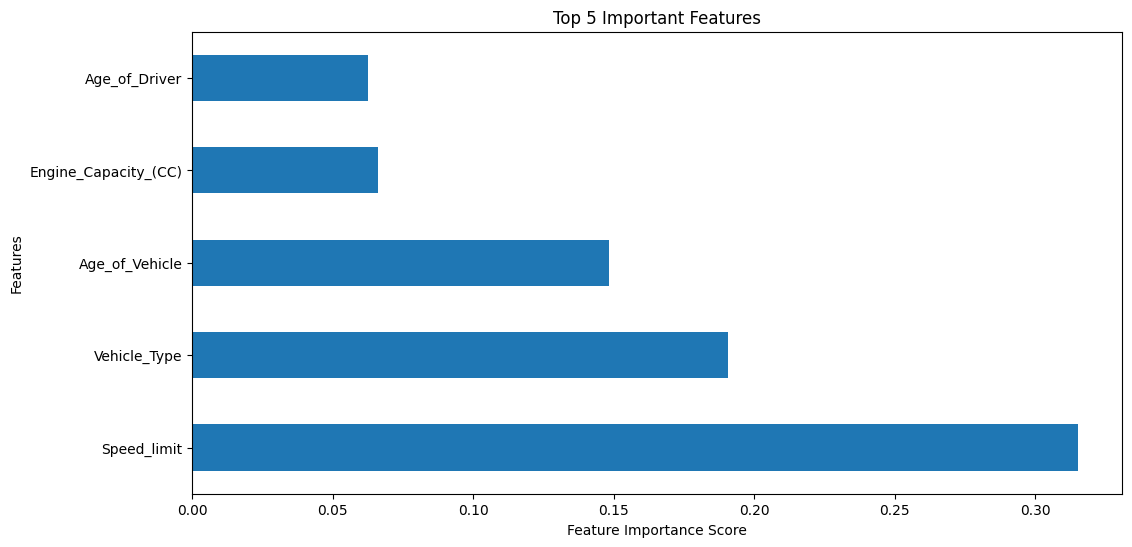

In [ ]:
# Feature Importance
plt.figure(figsize=(12,6))
feat_importances = pd.Series(random_forest.feature_importances_, index=X_train.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.title("Top 5 Important Features")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.show()


In [ ]:
# Model Evaluation
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)


In [ ]:
# Classification Report
sk_report = classification_report(y_test, Y_pred, digits=6)
print("Accuracy:", acc_random_forest)
print(sk_report)


Accuracy: 78.04
              precision    recall  f1-score   support

       Fatal   0.933333  0.024955  0.048611       561
     Serious   0.648148  0.163333  0.260916      1500
      Slight   0.786267  0.988877  0.876009      6473

    accuracy                       0.780408      8534
   macro avg   0.789250  0.392389  0.395179      8534
weighted avg   0.771658  0.780408  0.713505      8534



In [ ]:
# Confusion Matrix
conf_matrix = pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(conf_matrix)

Predicted  Fatal  Serious  Slight   All
Actual                                 
Fatal         14       61     486   561
Serious        1      245    1254  1500
Slight         0       72    6401  6473
All           15      378    8141  8534


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


In [ ]:
# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, random_state=42)

In [ ]:
# Train Decision Tree Model
dt_model = DecisionTreeClassifier(max_depth=10, random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=10, random_state=42)

In [ ]:
# Train Logistic Regression Model
lr_model = LogisticRegression(max_iter=500, random_state=42)
lr_model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500, random_state=42)

In [ ]:
# Feature Importance from Random Forest
rf_importance = pd.Series(rf_model.feature_importances_, index=X_train.columns).nlargest(5)

In [ ]:
# Feature Importance from Decision Tree
dt_importance = pd.Series(dt_model.feature_importances_, index=X_train.columns).nlargest(5)

In [ ]:
# Feature Importance from Logistic Regression (absolute coefficient values)
lr_importance = pd.Series(np.abs(lr_model.coef_[0]), index=X_train.columns).nlargest(5)

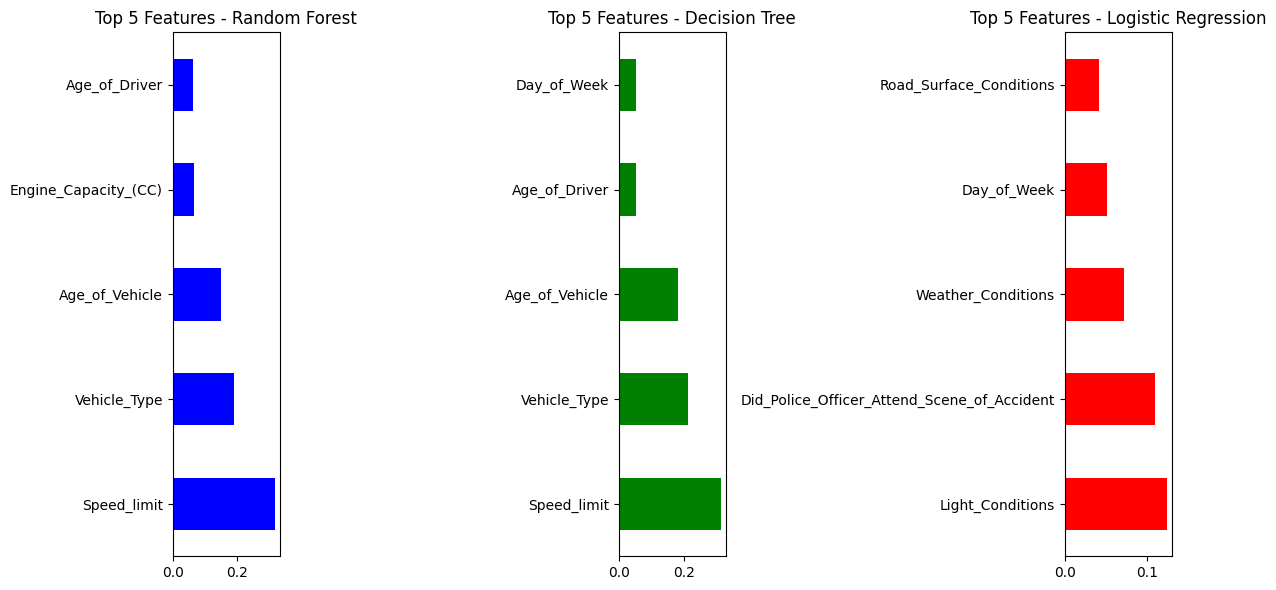

In [ ]:
# Plot Feature Importance
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
rf_importance.plot(kind='barh', color='blue')
plt.title("Top 5 Features - Random Forest")

plt.subplot(1, 3, 2)
dt_importance.plot(kind='barh', color='green')
plt.title("Top 5 Features - Decision Tree")

plt.subplot(1, 3, 3)
lr_importance.plot(kind='barh', color='red')
plt.title("Top 5 Features - Logistic Regression")

plt.tight_layout()
plt.show()